In [1]:
from settings import *

random_rho0s: setting seed=27937


In [2]:
H = create_hamiltonian(system), 0.1

In [3]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("ham fix t", H), ("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

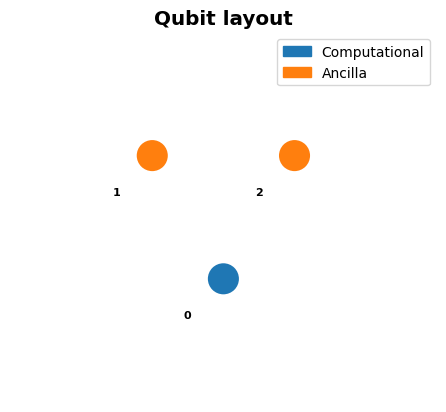

In [4]:
qubits.show_layout()

In [5]:
# theta_opt, errors, thetas = optimize(circuit, training_data, max_count=100, theta_init=np.ones(circuit.P)*0.1)

# np.save("losses_theta_opt", theta_opt)
# np.save("losses_thetas", thetas)
# np.save("losses_errors", errors)

In [6]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

In [7]:
theta_opt

array([-1.14520711,  0.1       ,  0.1       , -0.46472547,  0.3607957 ,
        0.3607957 , -1.18369579,  0.07804593,  0.07804593,  0.01700064,
       -1.18369579,  0.07804593,  0.07804593, -0.45209702,  0.35092183,
        0.35092183, -1.18622309,  0.06586907,  0.06586907,  0.00723401,
       -1.18622309,  0.06586907,  0.06586907, -0.46648009,  0.32128076,
        0.32128076, -1.21359325,  0.06847678,  0.06847678,  0.05782805,
       -1.21359325,  0.06847678,  0.06847678, -0.35825574,  0.28385647,
        0.28385647, -1.23864319,  0.08471364,  0.08471364,  0.11401312,
       -1.23864319,  0.08471364,  0.08471364, -0.37611263,  0.23680306,
        0.23680306, -1.24335768,  0.1       ,  0.1       ,  0.22923767])

rho_rand_haar: seed=73701


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

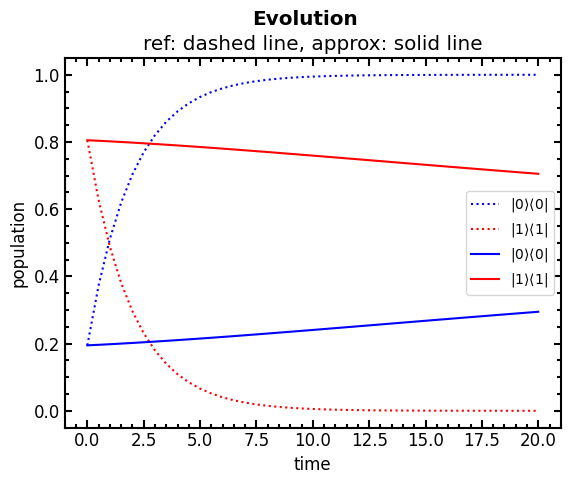

In [8]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

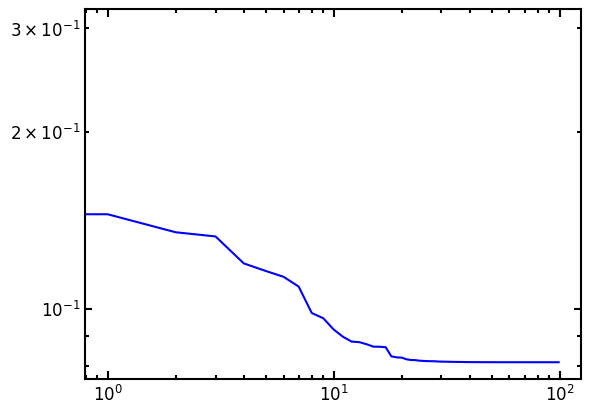

In [9]:
plt.loglog(errors)